In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2023-08-09 10:24:13--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-08-09 10:24:13--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7c2cf6a6a83b907ff58dfecd41.dl.dropboxusercontent.com/cd/0/inline/CBeqtIrRpoUbBGDjy58SjNL_QsWrFiLjYm5UrnC8Cz-lJav5aMZ_9_9SFbJW8unl2Tol4rwBT1716kG01RmKro6wPBD4s0cfDbGez7wEoo7v6ZAPWv-v103mQN7wubqhb4hfSmB5MPevrfjzl2NXyHJC/file# [following]
--2023-08-09 10:24:14--  https://uc7c2cf6a6a83b907ff58dfecd41.dl.dropboxusercontent.com/cd/0/inline/CBeqtIrRpoUbBGDjy58SjNL_QsWrFiLjYm5UrnC8Cz-lJav5aMZ_9_9SFbJW8unl2Tol4rwBT1716kG01RmKro6wPB

Download the data

Unzip the data

In [2]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/dogs/dog.1930.jpg  
  inflating: training_set/training_set/dogs/dog.1931.jpg  
  inflating: training_set/training_set/dogs/dog.1932.jpg  
  inflating: training_set/training_set/dogs/dog.1933.jpg  
  inflating: training_set/training_set/dogs/dog.1934.jpg  
  inflating: training_set/training_set/dogs/dog.1935.jpg  
  inflating: training_set/training_set/dogs/dog.1936.jpg  
  inflating: training_set/training_set/dogs/dog.1937.jpg  
  inflating: training_set/training_set/dogs/dog.1938.jpg  
  inflating: training_set/training_set/dogs/dog.1939.jpg  
  inflating: training_set/training_set/dogs/dog.194.jpg  
  inflating: training_set/training_set/dogs/dog.1940.jpg  
  inflating: training_set/training_set/dogs/dog.1941.jpg  
  inflating: training_set/training_set/dogs/dog.1942.jpg  
  inflating: training_set/training_set/dogs/dog.1943.jpg  
  inflating: training_set/training_set/dogs/dog.1944.jpg  
  infl

- Load the images and verify the shapes
- Explore a few images
- Declare a model: Sequential,functional
- Specify layers: Conv2d, Max Pooling, Dense, Dropout
- Compile the layers: Optimizer, Loss, Metrics - Accuracy
- Fit the model: x, y, validation, epochs, batch size
- Checkpointing

Populating the interactive namespace from numpy and matplotlib


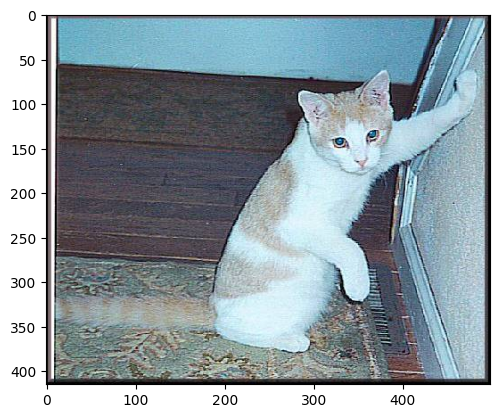

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()

In [4]:
img.shape

(415, 498, 3)

Populating the interactive namespace from numpy and matplotlib


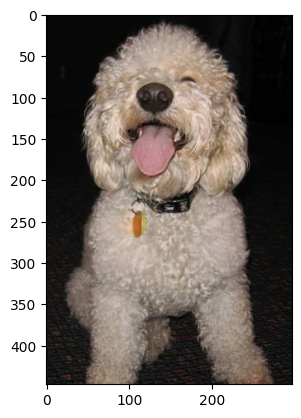

In [5]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

In [6]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [8]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

load imgages and add varaiation

In [9]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator (rescale=1. /255)


In [10]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

Found 8005 images belonging to 2 classes.


In [11]:
validation_generator =train_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

Found 2023 images belonging to 2 classes.


Create the model

In [12]:
model = Sequential()
#Block 1
model.add(Conv2D(64, (3,3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#BLOCK 2
model.add(Conv2D(128, (3,3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#classification
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                    

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
training = model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data= validation_generator,
                       validation_steps=nb_validation_samples)

<ipython-input-15-6b6e5721faf3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - 45s 343ms/step - loss: 1.0630 - accuracy: 0.5500 - val_loss: 0.6879 - val_accuracy: 0.5385
Epoch 2/20
100/100 [==============================] - 33s 337ms/step - loss: 0.6905 - accuracy: 0.5345 - val_loss: 0.6812 - val_accuracy: 0.5650
Epoch 3/20
100/100 [==============================] - 25s 249ms/step - loss: 0.6866 - accuracy: 0.5525 - val_loss: 0.6800 - val_accuracy: 0.5650
Epoch 4/20
100/100 [==============================] - 34s 340ms/step - loss: 0.6888 - accuracy: 0.5500 - val_loss: 0.6819 - val_accuracy: 0.5765
Epoch 5/20
100/100 [==============================] - 26s 262ms/step - loss: 0.6776 - accuracy: 0.5630 - val_loss: 0.6897 - val_accuracy: 0.5565
Epoch 6/20
100/100 [==============================] - 34s 338ms/step - loss: 0.6811 - accuracy: 0.5825 - val_loss: 0.6768 - val_accuracy: 0.5790
Epoch 7/20
100/100 [==============================] - 25s 252ms/step - loss: 0.6852 - accuracy: 0.5642 - val_loss: 0.6858 - val_ac

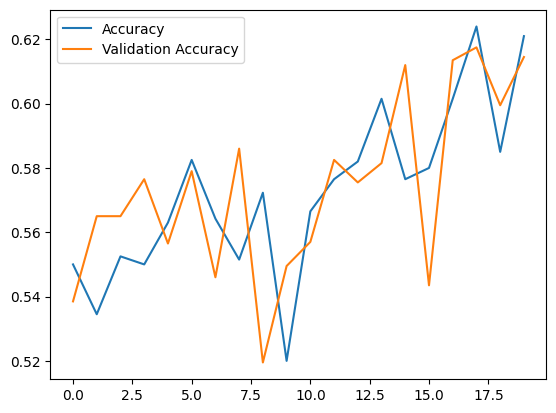

In [16]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

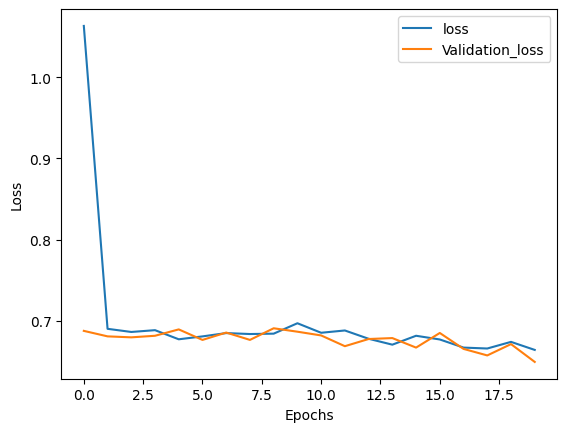

In [17]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['loss', 'Validation_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/labrador-retriever-1210559_640.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

In [26]:
rslt = model.predict(img_pred)


1/1 [==============================] - 0s 31ms/step


In [27]:
rslt

array([[1.]], dtype=float32)

In [28]:
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

Prediction:  Dog


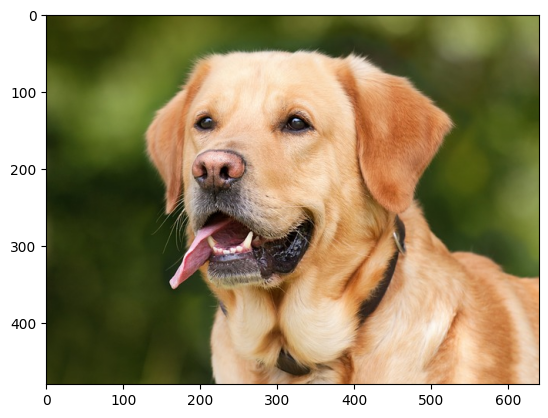

In [29]:
img=mpimg.imread("/content/labrador-retriever-1210559_640.jpg")
imgplot = plt.imshow(img)
plt.show()

transfer learning

In [30]:
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model
from keras import applications


In [31]:
pre_trained_model= VGG16(input_shape=input_shape,include_top=False,weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [32]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [33]:
for layers in pre_trained_model.layers[:15]:
  layers.trainable=False
for layers in pre_trained_model.layers[15:]:
  layers.trainable=True
last_layer=pre_trained_model.get_layer('block5_pool')
last_output=last_layer.output

In [34]:
last_output

<KerasTensor: shape=(None, 4, 4, 512) dtype=float32 (created by layer 'block5_pool')>

In [35]:
x=GlobalMaxPooling2D()(last_output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(1,activation='sigmoid')(x)

In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
training_1 = model.fit_generator(train_generator, steps_per_epoch = nb_train_sample, epochs=epochs, validation_data=validation_generator, validation_steps=nb_validation_samples)

Epoch 1/20


<ipython-input-37-f76704883a42>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_1 = model.fit_generator(train_generator, steps_per_epoch = nb_train_sample, epochs=epochs, validation_data=validation_generator, validation_steps=nb_validation_samples)


100/100 [==============================] - 35s 338ms/step - loss: 0.6628 - accuracy: 0.6156 - val_loss: 0.6497 - val_accuracy: 0.6320
Epoch 2/20
100/100 [==============================] - 33s 336ms/step - loss: 0.6431 - accuracy: 0.6500 - val_loss: 0.6481 - val_accuracy: 0.6420
Epoch 3/20
100/100 [==============================] - 27s 268ms/step - loss: 0.6196 - accuracy: 0.6544 - val_loss: 0.6415 - val_accuracy: 0.6340
Epoch 4/20
100/100 [==============================] - 34s 341ms/step - loss: 0.6339 - accuracy: 0.6600 - val_loss: 0.6323 - val_accuracy: 0.6580
Epoch 5/20
100/100 [==============================] - 34s 337ms/step - loss: 0.6028 - accuracy: 0.6872 - val_loss: 0.6036 - val_accuracy: 0.6720
Epoch 6/20
100/100 [==============================] - 34s 338ms/step - loss: 0.6055 - accuracy: 0.6745 - val_loss: 0.6286 - val_accuracy: 0.6625
Epoch 7/20
100/100 [==============================] - 25s 252ms/step - loss: 0.5993 - accuracy: 0.6835 - val_loss: 0.5828 - val_accuracy: 0.6